<a href="https://colab.research.google.com/github/rizky-gumelar/Bengkod-Data-Analyst/blob/main/Tugas_Associate_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Tugas 1 Associate Data Science**

---


 Nama : Rizky Syah Gumelar

 NIM : A11.2021.13304

 Link Youtube : https://www.youtube.com/watch?v=Nqt8u1VU-h8

 Link Youtube 2 : https://youtu.be/xoxFpPnXTBQ

---


 Link dataset: https://drive.google.com/file/d/1tNtzZ25FPpZ1-ooy9LNsgzNg8FCVdQ6Z/view


Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Table of Contents

1. Mengumpulkan Data
2. Menelaah Data
3. Memvalidasi Data
4. Menetukan Object Data
5. Membersihkan Data
6. Mengkonstruksi Data
7. Menentukan Label Data
8. Membangun Model
9. Mengevaluasi Hasil Pemodelan
10. Optimasi Model Klasifikasi

# Step 1: Mengumpulkan Data


Cardiotocography (CTG) adalah alat yang digunakan selama kehamilan untuk memantau detak jantung janin dan kontraksi rahim. Tujuan utamanya adalah untuk memantau kesejahteraan janin dan memungkinkan deteksi dini jika ada tanda-tanda stres pada janin. Interpretasi CTG membantu menentukan apakah kehamilan berisiko tinggi atau rendah. CTG yang abnormal bisa menunjukkan perlunya penyelidikan lebih lanjut atau tindakan medis.

Pada dataset ini, Cardiotocograms (CTG) adalah opsi yang sederhana dan terjangkau untuk menilai kesehatan janin, sehingga tenaga medis dapat segera mengambil tindakan untuk mencegah kematian pada ibu dan anak. Alat ini bekerja dengan mengirimkan pulsa ultrasound dan membaca responsnya, yang memberikan informasi mengenai detak jantung janin (FHR), pergerakan janin, kontraksi rahim, dan lainnya.

Dataset ini berisi 2126 data yang diambil dari pemeriksaan Cardiotocogram, yang kemudian diklasifikasikan oleh ahli obstetri ke dalam 3 kelas, yaitu:

* Normal
* Suspect (Dicurigai)
* Pathological (Patologis)

In [ ]:
df = pd.read_csv('/content/fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,NaN,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# Step 2: Menelaah Data

In [ ]:
df.shape

(2126, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    1914 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                1914 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,1914.000000,2126.000000,2126.000000,1914.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,1914.000000,2126.000000,2126.000000,1914.000000,1914.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004372,0.001889,0.000003,0.000158,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.477011,134.610536,138.090310,19.020899,0.319749,1.304327
std,9.840844,0.003866,0.046666,0.002953,0.002960,0.000057,0.000592,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.434563,15.593596,14.466589,29.628676,0.610208,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

# Step 3: Validasi Data

In [ ]:
df.isnull().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,212
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,212
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


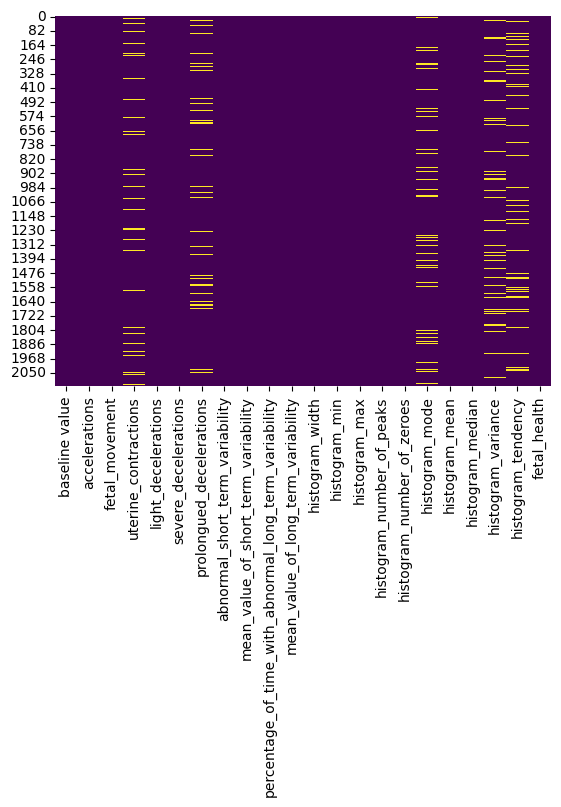

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

<ipython-input-13-f82b104d3746>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, hue=None, x="fetal_health", palette=colours, legend=False)


<Axes: xlabel='fetal_health', ylabel='count'>

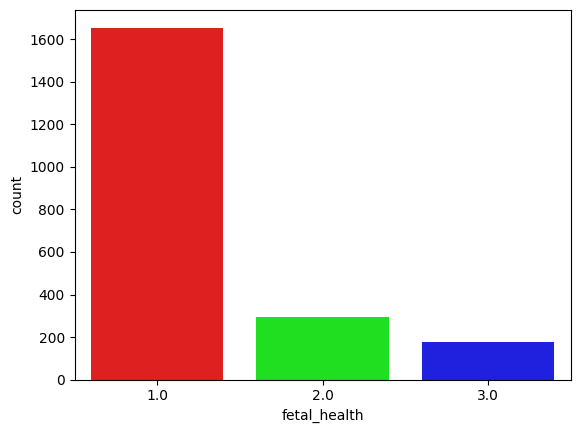

In [ ]:
colours=["#ff0000","#00ff00", "#0000ff"]
sns.countplot(data=df, hue=None, x="fetal_health", palette=colours, legend=False)

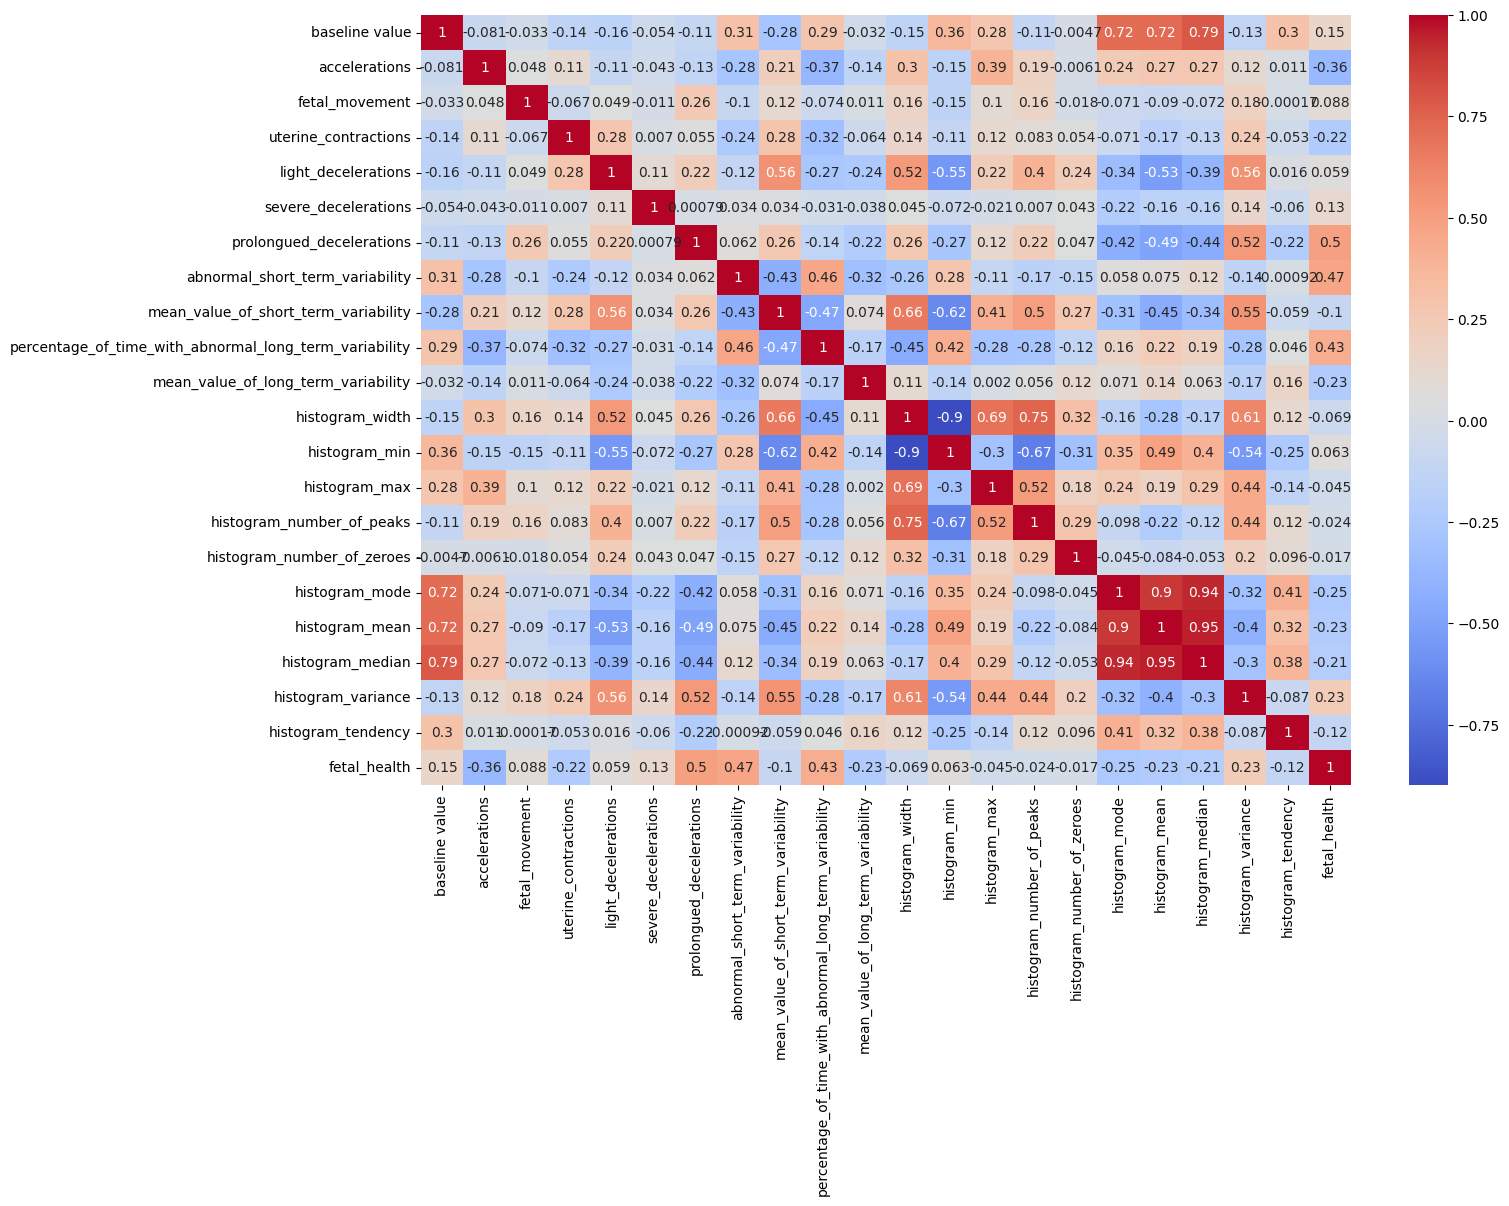

In [ ]:
matriksCorr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(matriksCorr, cmap='coolwarm', annot=True, annot_kws={'fontsize': 10})

plt.show()

# Step 4: Menentukan Objek Data

In [ ]:
# Target: fetal_health (0 = Tidak Selamat, 1 = Selamat)
# Fitur yang dijadikan input
X = df.drop(["fetal_health"], axis=1)

# Fitur yang dijadikan sebagai target
y = df["fetal_health"]

# Mengecek dimensi X dan y
X.shape, y.shape

((2126, 21), (2126,))

# Step 5: Membersihkan Data

In [ ]:
for col in df.columns:
  df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-16-38270c3c0fe4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


In [ ]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

#Step 6: Mengkontruksi Data

In [ ]:
# Memilih fitur dan target
X = df.drop(["fetal_health"], axis=1)
y = df['fetal_health']  # Target

# Mengecek dimensi X dan y
X.shape, y.shape

((2126, 21), (2126,))

#Step 7: Menentukan Label Data

In [ ]:
unique_values = df['fetal_health'].unique()

print(unique_values)

[2. 1. 3.]


[2. 1. 3.]


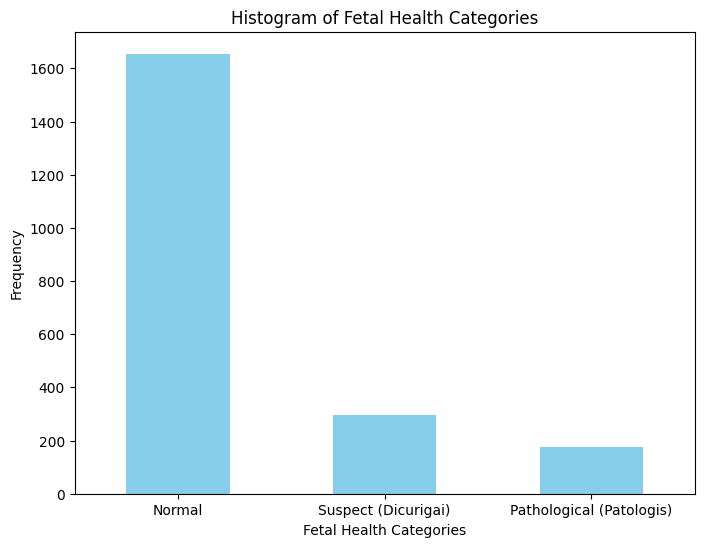

In [ ]:
# Mendapatkan nilai unik pada kolom 'fetal_health'
unique_values = df['fetal_health'].unique()
print(unique_values)

# Mendefinisikan mapping kategori
category_mapping = {1: 'Normal', 2: 'Suspect (Dicurigai)', 3: 'Pathological (Patologis)'}

# Membuat histogram untuk kolom 'fetal_health'
plt.figure(figsize=(8,6))
df['fetal_health'].value_counts().sort_index().plot(kind='bar', color='skyblue')

# Menambahkan label kategori pada sumbu-x
plt.xticks(ticks=[0, 1, 2], labels=[category_mapping[1], category_mapping[2], category_mapping[3]], rotation=0)

# Menambahkan label dan judul
plt.title('Histogram of Fetal Health Categories')
plt.xlabel('Fetal Health Categories')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

#Step 8: Membangun Model

1. Naive Bayes  
2. Logistic Regression
3. Decision Tree
4. K Nearest Neighbor
5. Random Forest
6. Support Vector Classifier

In [ ]:
#Modul Scikit-Learn untuk Splitting Data
from sklearn.model_selection import train_test_split

#Model Klasifikasi
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#Support Vector Machine (SVM)
from sklearn.svm import SVC
#XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

#Metrik Evaluasi
#Accuracy Score : Mengukur persentase prediksi yang benar dari total prediksi.
#Classification Report : Memberikan informasi tentang precision, recall, F1-score, dan support untuk setiap kelas.
#Confusion Matrix : Menampilkan matriks kesalahan (jumlah prediksi benar dan salah untuk tiap kelas).
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Gaussian Naive Bayes

In [ ]:
# Melatih model Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred_gnb = gnb.predict(X_test)

# Menghitung dan menampilkan akurasi
accuracy = accuracy_score(y_test, y_pred_gnb)
print('Gaussian Accuracy:', round(accuracy, 2))

# Menampilkan laporan klasifikasi
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_gnb))

Gaussian Accuracy: 0.81

Classification Report:

              precision    recall  f1-score   support

         1.0       0.97      0.80      0.88       333
         2.0       0.50      0.89      0.64        64
         3.0       0.49      0.62      0.55        29

    accuracy                           0.81       426
   macro avg       0.65      0.77      0.69       426
weighted avg       0.87      0.81      0.82       426



In [ ]:
#Membuat Model Logistic Regression
#Membuat instance model regresi logistik | Membuat instance model regresi logistik.
log_reg = LogisticRegression(max_iter=1000)
#Melatih Model | X_train: Fitur pada data pelatihan. | y_train: Label target pada data pelatihan.
log_reg.fit(X_train, y_train)
#Membuat Prediksi | X_test: Fitur pada data uji. | Hasil prediksi disimpan dalam variabel y_pred_log_reg.
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))

# Menampilkan laporan klasifikasi
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.8826291079812206

Classification Report:

              precision    recall  f1-score   support

         1.0       0.92      0.96      0.94       333
         2.0       0.71      0.50      0.59        64
         3.0       0.71      0.83      0.76        29

    accuracy                           0.88       426
   macro avg       0.78      0.76      0.76       426
weighted avg       0.88      0.88      0.88       426



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Menggunakan algoritme Decision Tree Classifier untuk melakukan klasifikasi.
dt = DecisionTreeClassifier(random_state=42)
#Melatih Model | X_train: Fitur pada data pelatihan. | y_train: Label target pada data pelatihan.
dt.fit(X_train, y_train)
#Membuat Prediksi | X_test: Fitur pada data uji. | Hasil prediksi disimpan dalam variabel y_pred_dt.
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Menampilkan laporan klasifikasi
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9178403755868545

Classification Report:

              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       333
         2.0       0.76      0.78      0.77        64
         3.0       0.85      0.97      0.90        29

    accuracy                           0.92       426
   macro avg       0.85      0.90      0.87       426
weighted avg       0.92      0.92      0.92       426



In [ ]:
# Membuat Model K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
#Melatih Model | X_train: Fitur pada data pelatihan. | y_train: Label target pada data pelatihan.
knn.fit(X_train, y_train)
#Membuat Prediksi | X_test: Fitur pada data uji. | Hasil prediksi disimpan dalam variabel y_pred_dt.
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# Menampilkan laporan klasifikasi
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8755868544600939

Classification Report:

              precision    recall  f1-score   support

         1.0       0.91      0.95      0.93       333
         2.0       0.64      0.56      0.60        64
         3.0       0.95      0.69      0.80        29

    accuracy                           0.88       426
   macro avg       0.83      0.73      0.78       426
weighted avg       0.87      0.88      0.87       426



In [ ]:
#Model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
#Melatih Model | X_train: Fitur pada data pelatihan. | y_train: Label target pada data pelatihan.
rf.fit(X_train, y_train)
#Membuat Prediksi | X_test: Fitur pada data uji. | Hasil prediksi disimpan dalam variabel y_pred_rf.
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Menampilkan laporan klasifikasi
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_knn))

Random Forest Accuracy: 0.9483568075117371

Classification Report:

              precision    recall  f1-score   support

         1.0       0.91      0.95      0.93       333
         2.0       0.64      0.56      0.60        64
         3.0       0.95      0.69      0.80        29

    accuracy                           0.88       426
   macro avg       0.83      0.73      0.78       426
weighted avg       0.87      0.88      0.87       426



In [ ]:
#Model SVC
svc = SVC(probability=True, random_state=42)
#Melatih Model | X_train: Fitur pada data pelatihan. | y_train: Label target pada data pelatihan.
svc.fit(X_train, y_train)
#Membuat Prediksi | X_test: Fitur pada data uji. | Hasil prediksi disimpan dalam variabel y_pred_svc.
y_pred_svc = svc.predict(X_test)

print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))

# Menampilkan laporan klasifikasi
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_svc))

SVC Accuracy: 0.8591549295774648

Classification Report:

              precision    recall  f1-score   support

         1.0       0.89      0.96      0.92       333
         2.0       0.63      0.42      0.50        64
         3.0       0.86      0.62      0.72        29

    accuracy                           0.86       426
   macro avg       0.79      0.67      0.72       426
weighted avg       0.85      0.86      0.85       426



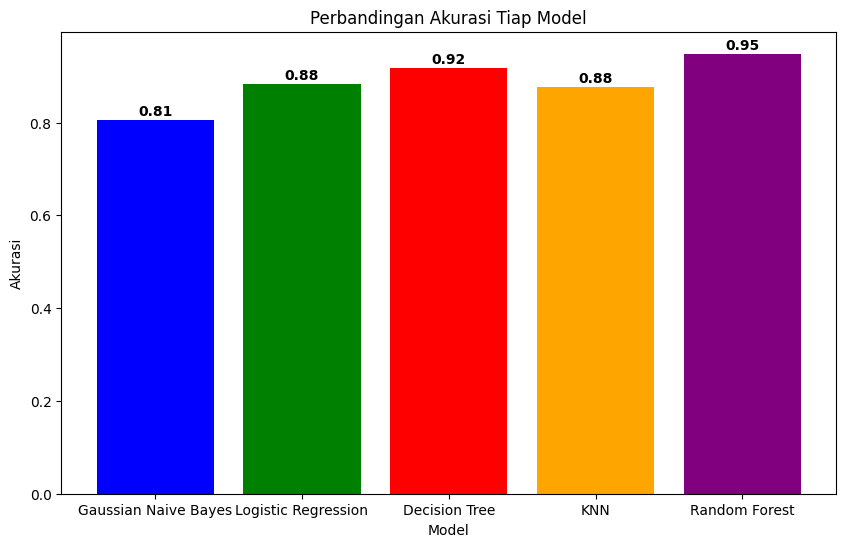

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ----> Calculate and store the accuracy scores <----
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Akurasi model yang sudah dihitung sebelumnya
models = ['Gaussian Naive Bayes', 'Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest']
accuracies = [accuracy_gnb, accuracy_log_reg, accuracy_dt, accuracy_knn, accuracy_rf]

# Membuat grafik bar
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange', 'purple'])

# Menambahkan label dan judul
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Tiap Model')

# Menampilkan nilai akurasi di atas batang
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, round(acc, 2), ha='center', color='black', fontweight='bold')

# Menampilkan grafik
plt.show()


# Step 9: Evaluasi model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Parameter grid untuk Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5
)
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
# Mendapatkan parameter terbaik dari grid search
best_params = grid_search.best_params_

# Membuat model RandomForest dengan parameter terbaik
best_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

# Melatih model dengan data pelatihan
best_rf.fit(X_train, y_train)

# Melakukan prediksi dengan model yang sudah dilatih
y_pred_best_rf = best_rf.predict(X_test)

# Menghitung akurasi model
from sklearn.metrics import accuracy_score, classification_report

# Menampilkan akurasi
print("Accuracy of Best Random Forest Model:", accuracy_score(y_test, y_pred_best_rf))

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_rf))


Accuracy of Best Random Forest Model: 0.9366197183098591

Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.97      0.96       333
         2.0       0.84      0.77      0.80        64
         3.0       0.87      0.93      0.90        29

    accuracy                           0.94       426
   macro avg       0.89      0.89      0.89       426
weighted avg       0.94      0.94      0.94       426

